# About: Deep Learning '23 Assignment 1


We will perform Image Classification task on the MNIST dataset which has 70,000 28*28 images labelled into 10 classes. 

**Total Marks: 60**


**Fill these**

Name: Pretam Ray

Roll Number: 22CS72P03

**Instructions:**

1. We have left code cells blank for you to fill up with appropriate code. Do not add any extra code cells. Strictly follow the format and fill up the cells with the correct code. Refer to cell comments for what to fill in that cell.

2. *Do not* use any training frameworks like PyTorch Lightning. This assignment will test your ability to write custom training loops.

3. Save the notebook with cell outputs of all cells. The cell outputs  will be used for evaluating your submission.




In [1]:
import torch
import torch.nn as nn
import random
import numpy as np

from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader, Dataset


## Add any other imports here
import torch.nn.functional as F
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
SEED=42
torch.manual_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


## Getting the data

In [3]:
train_data = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST('data', train=False, download=True, transform=transforms.ToTensor())
train, val = random_split(train_data, [50000, 10000], generator=torch.Generator().manual_seed(SEED))

train_loader = DataLoader(train, batch_size=64, shuffle=True)
val_loader = DataLoader(val,batch_size=64, shuffle=False)
test_loader = DataLoader(test_data,batch_size=64, shuffle=False)


for X, y in train_loader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

print(len(train), len(val), len(test_data))

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
50000 10000 10000


## Defining the Model [18 marks]

You will define 3 models, with 2, 3, 4 hidden layers respectively. Lets call these models A, B, C. We will be studying the comparitive performance of these 3 models on this task.

### Model A

Architecture:

1. Input Layer 
2. Hidden Layer (Dimension Size - 64)
3. Activation Function
4. Hidden Layer (Dimension Size - 128)
5. Activation Function
6. Output Layer (Dimension Size = Number of Classes = 10)

In [4]:
# Model A Definition 

class modelA(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_sig = nn.Sequential(
            nn.Linear(28*28, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_sig(x)
        return logits

# Fill in appropriately while maintaining the name of the variable
modelA = modelA().to(device)
print(modelA)

modelA(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_sig): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)


### Model B


Architecture:

1. Input Layer 
2. Hidden Layer (Dimension Size - 64)
3. Activation Function
4. Hidden Layer (Dimension Size - 128)
5. Activation Function
6. Hidden Layer (Dimension Size - 256)
7. Activation Function
8. Output Layer (Dimension Size = Number of Classes = 10)

In [5]:
# Model B Definiton

class modelB(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_sig = nn.Sequential(
            nn.Linear(28*28, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_sig(x)
        return logits

# Fill in appropriately while maintaining the name of the variable
modelB = modelB().float().to(device)
print(modelB)

modelB(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_sig): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=10, bias=True)
  )
)


### Model C


Architecture

1. Input Layer 
2. Hidden Layer (Dimension Size - 64)
3. Activation Function
4. Hidden Layer (Dimension Size - 128)
5. Activation Function
6. Hidden Layer (Dimension Size - 256)
7. Activation Function
8. Hidden Layer (Dimension Size - 512)
9. Activation Function
10. Output Layer (Dimension Size = Number of Classes = 10)

In [6]:
# Model C Definiton

class modelC(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_sig = nn.Sequential(
            nn.Linear(28*28, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_sig(x)
        return logits

# Fill in appropriately while maintaining the name of the variable
modelC = modelC().to(device)
print(modelC)

modelC(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_sig): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=512, bias=True)
    (7): ReLU()
    (8): Linear(in_features=512, out_features=10, bias=True)
  )
)


## Loss Function & Optimizer [2 marks]

* Loss Function: Cross Entropy Loss
* Optimizer : Adam

Use PyTorch Library versions for these two.

In [7]:
# Use the same variable names
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelA.parameters(), lr=0.002)

## Training Loop [30 marks]

We give you the freedom to choose Hyperparameters like learing rate, number of epochs etc, but take care to use the **same** hyperparameters for all the 3 models. Also clearly state the hyperparameters you have chosen

For each model, You need to report these metrics: Train Loss, Val Loss, Train Accuracy, Val Accuracy at the end of each epoch.

Also plot the graphs of the following (in separate cells)
1. Train Loss & Val Loss V/s Epoch
2. Train Accuracy & Val Accuracy V/s Epoch

In [8]:
# Define the hyperparameters (same for all 3 models) here
epochs = 5

In [9]:
def clear():
    import gc
    gc.collect()
    torch.cuda.empty_cache()

In [10]:
# generic Training loop
def train(dataloader, model, criterion, optimizer):
    size = len(dataloader.dataset) # 50000
    num_batches = len(dataloader) # 782
    model.train()
    correct = 0
    run_loss = 0
    for (X, y) in tqdm(dataloader):
        X, y = X.to(device), y.to(device)
        # compute prediction error
        preds = model(X).float().to(device)
        loss = criterion(preds, y)
        run_loss += loss.item()
        correct += (preds.argmax(1) == y).type(torch.float).sum().item()

        # backpropagate
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


    run_loss /= num_batches
    correct /= size
    print(f"Training Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {run_loss:>8f} \n")
    return [run_loss, correct]

In [11]:
# generic eval loop
def evaluate(dataloader, model, criterion):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()  
    val_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X).float().to(device)
            val_loss += criterion(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    val_loss /= num_batches
    correct /= size
    print(f"Validation Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {val_loss:>8f} \n")
    return [val_loss, correct]


### Model A 



In [12]:
# Training Loop for model A
clear()
modelA_train_acc = []
modelA_train_loss = []
modelA_eval_loss = []
modelA_eval_acc = []
for t in tqdm(range(epochs)):
    print(f"Epoch {t+1}\n-------------------------------")
    res_train = train(train_loader, modelA, criterion, optimizer)
    modelA_train_loss.append(res_train[0])
    modelA_train_acc.append(res_train[1])
    res_val = evaluate(val_loader, modelA, criterion)
    modelA_eval_loss.append(res_val[0])
    modelA_eval_acc.append(res_val[1])

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1
-------------------------------


100%|██████████| 782/782 [00:02<00:00, 316.54it/s]


Training Error: 
 Accuracy: 90.8%, Avg loss: 0.315696 



 20%|██        | 1/5 [00:02<00:11,  2.77s/it]

Validation Error: 
 Accuracy: 94.7%, Avg loss: 0.178716 

Epoch 2
-------------------------------


100%|██████████| 782/782 [00:04<00:00, 165.23it/s]


Training Error: 
 Accuracy: 95.7%, Avg loss: 0.138950 



 40%|████      | 2/5 [00:08<00:13,  4.46s/it]

Validation Error: 
 Accuracy: 95.4%, Avg loss: 0.150793 

Epoch 3
-------------------------------


100%|██████████| 782/782 [00:07<00:00, 107.89it/s]


Training Error: 
 Accuracy: 96.8%, Avg loss: 0.101755 



 60%|██████    | 3/5 [00:15<00:11,  5.87s/it]

Validation Error: 
 Accuracy: 96.7%, Avg loss: 0.110089 

Epoch 4
-------------------------------


100%|██████████| 782/782 [00:02<00:00, 378.89it/s]


Training Error: 
 Accuracy: 97.5%, Avg loss: 0.076323 



 80%|████████  | 4/5 [00:18<00:04,  4.48s/it]

Validation Error: 
 Accuracy: 96.0%, Avg loss: 0.141678 

Epoch 5
-------------------------------


100%|██████████| 782/782 [00:02<00:00, 375.04it/s]


Training Error: 
 Accuracy: 98.1%, Avg loss: 0.062738 



100%|██████████| 5/5 [00:20<00:00,  4.14s/it]

Validation Error: 
 Accuracy: 96.6%, Avg loss: 0.116476 



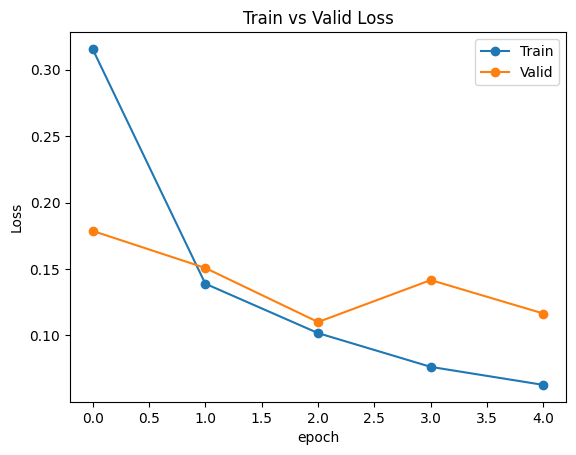

In [13]:
# Plot Graph of Train & Val Loss vs Epoch (together in same plot) for model A
plt.plot(modelA_train_loss,'-o')
plt.plot(modelA_eval_loss,'-o')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Loss')
plt.show()

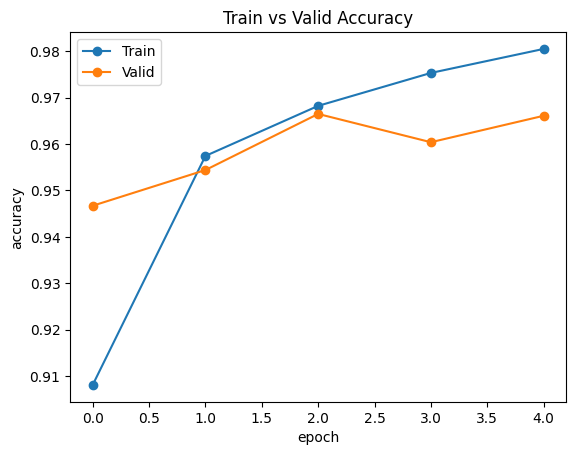

In [14]:
# Plot Graph of Train & Val Accuracy vs Epoch (together in same plot) for model A
plt.plot(modelA_train_acc,'-o')
plt.plot(modelA_eval_acc, '-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Accuracy')
plt.show()

In [34]:
# Use the same variable names
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelB.parameters(), lr=0.002)

### Model B


In [35]:
# Training Loop for model B
clear()
modelB_train_acc = []
modelB_train_loss = []
modelB_eval_loss = []
modelB_eval_acc = []
for t in tqdm(range(epochs)):
    print(f"Epoch {t+1}\n-------------------------------")
    res_trainB = train(train_loader, modelB, criterion, optimizer)
    modelB_train_loss.append(res_trainB[0])
    modelB_train_acc.append(res_trainB[1])
    res_valB = evaluate(val_loader, modelB, criterion)
    modelB_eval_loss.append(res_valB[0])
    modelB_eval_acc.append(res_valB[1])

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1
-------------------------------


100%|██████████| 782/782 [00:02<00:00, 318.44it/s]


Training Error: 
 Accuracy: 90.9%, Avg loss: 0.300463 



 20%|██        | 1/5 [00:02<00:10,  2.74s/it]

Validation Error: 
 Accuracy: 95.2%, Avg loss: 0.160410 

Epoch 2
-------------------------------


100%|██████████| 782/782 [00:02<00:00, 337.00it/s]


Training Error: 
 Accuracy: 95.9%, Avg loss: 0.129891 



 40%|████      | 2/5 [00:05<00:07,  2.67s/it]

Validation Error: 
 Accuracy: 95.0%, Avg loss: 0.169174 

Epoch 3
-------------------------------


100%|██████████| 782/782 [00:05<00:00, 137.08it/s]


Training Error: 
 Accuracy: 96.9%, Avg loss: 0.099947 



 60%|██████    | 3/5 [00:11<00:08,  4.48s/it]

Validation Error: 
 Accuracy: 96.5%, Avg loss: 0.118310 

Epoch 4
-------------------------------


100%|██████████| 782/782 [00:06<00:00, 124.73it/s]


Training Error: 
 Accuracy: 97.6%, Avg loss: 0.076581 



 80%|████████  | 4/5 [00:19<00:05,  5.55s/it]

Validation Error: 
 Accuracy: 96.3%, Avg loss: 0.131189 

Epoch 5
-------------------------------


100%|██████████| 782/782 [00:04<00:00, 156.86it/s]


Training Error: 
 Accuracy: 97.8%, Avg loss: 0.068847 



100%|██████████| 5/5 [00:24<00:00,  4.89s/it]

Validation Error: 
 Accuracy: 96.0%, Avg loss: 0.142246 



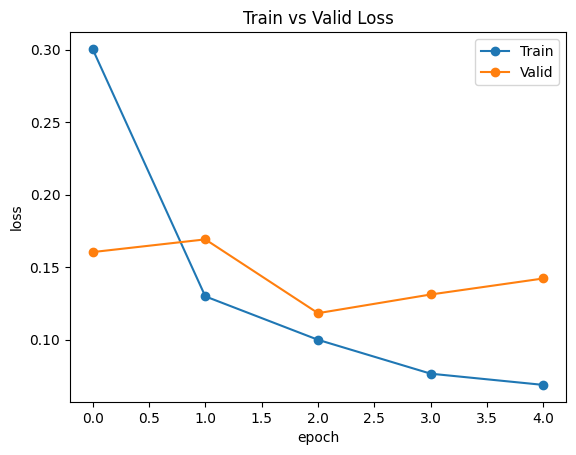

In [36]:
# Plot Graph of Train & Val Loss vs Epoch (together in same plot) for model B
plt.plot(modelB_train_loss,'-o')
plt.plot(modelB_eval_loss,'-o')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Loss')
plt.show()

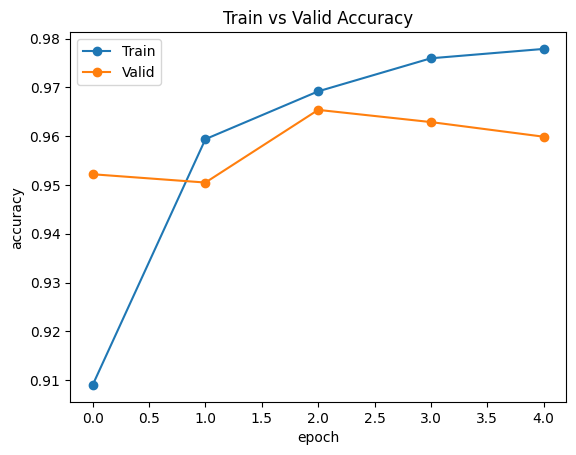

In [37]:
# Plot Graph of Train & Val Accuracy vs Epoch (together in same plot) for model B
plt.plot(modelB_train_acc,'-o')
plt.plot(modelB_eval_acc,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Accuracy')
plt.show()

In [38]:
# Use the same variable names
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelC.parameters(), lr=0.002)

### Model C


In [39]:
# Training Loop for model C
clear()
modelC_train_acc = []
modelC_train_loss = []
modelC_eval_loss = []
modelC_eval_acc = []
for t in tqdm(range(epochs)):
    print(f"Epoch {t+1}\n-------------------------------")
    res_trainB = train(train_loader, modelC, criterion, optimizer)
    modelC_train_loss.append(res_trainB[0])
    modelC_train_acc.append(res_trainB[1])
    res_valB = evaluate(val_loader, modelC, criterion)
    modelC_eval_loss.append(res_valB[0])
    modelC_eval_acc.append(res_valB[1])

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1
-------------------------------


100%|██████████| 782/782 [00:04<00:00, 169.06it/s]


Training Error: 
 Accuracy: 90.2%, Avg loss: 0.311962 



 20%|██        | 1/5 [00:04<00:19,  4.92s/it]

Validation Error: 
 Accuracy: 93.4%, Avg loss: 0.237019 

Epoch 2
-------------------------------


100%|██████████| 782/782 [00:02<00:00, 355.22it/s]


Training Error: 
 Accuracy: 95.7%, Avg loss: 0.142052 



 40%|████      | 2/5 [00:07<00:10,  3.49s/it]

Validation Error: 
 Accuracy: 95.6%, Avg loss: 0.156566 

Epoch 3
-------------------------------


100%|██████████| 782/782 [00:02<00:00, 294.58it/s]


Training Error: 
 Accuracy: 96.8%, Avg loss: 0.107787 



 60%|██████    | 3/5 [00:10<00:06,  3.25s/it]

Validation Error: 
 Accuracy: 96.1%, Avg loss: 0.137942 

Epoch 4
-------------------------------


100%|██████████| 782/782 [00:02<00:00, 305.91it/s]


Training Error: 
 Accuracy: 97.4%, Avg loss: 0.090054 



 80%|████████  | 4/5 [00:13<00:03,  3.09s/it]

Validation Error: 
 Accuracy: 96.4%, Avg loss: 0.135653 

Epoch 5
-------------------------------


100%|██████████| 782/782 [00:04<00:00, 165.93it/s]


Training Error: 
 Accuracy: 97.7%, Avg loss: 0.077423 



100%|██████████| 5/5 [00:18<00:00,  3.65s/it]

Validation Error: 
 Accuracy: 96.7%, Avg loss: 0.109692 



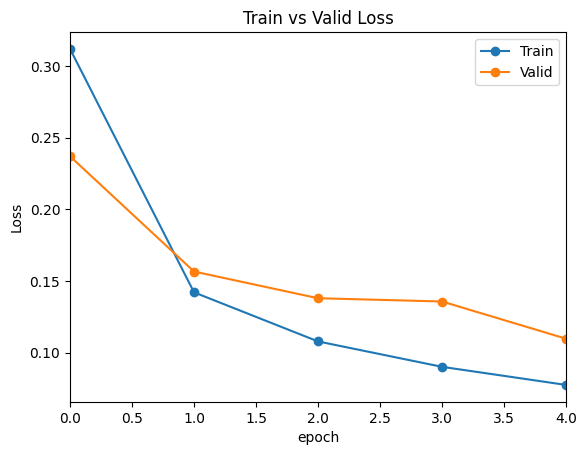

In [40]:
# Plot Graph of Train & Val Loss vs Epoch (together in same plot) for model C
plt.plot(modelC_train_loss,'-o')
plt.plot(modelC_eval_loss,'-o')
plt.xlim(0,4)
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Loss')
plt.show()

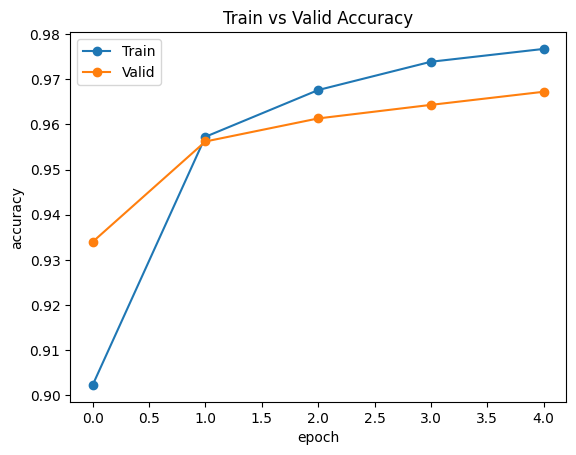

In [41]:
# Plot Graph of Train & Val Accuracy vs Epoch (together in same plot) for model C
plt.plot(modelC_train_acc,'-o')
plt.plot(modelC_eval_acc,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Accuracy')
plt.show()

## Choosing a Activation Function [10 marks]

Based on the best performing model you found above, define 2 more models with these 2 activation functions (1 activation function is used throughout the model definiation). Use these Activation funcitons 


*   Tanh
*   LeakyRELU

In [48]:
# Leaky ReLU model definiton
class model_lrelu(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_sig = nn.Sequential(
            nn.Linear(28*28, 64),
            nn.LeakyReLU(),
            nn.Linear(64, 128),
            nn.LeakyReLU(),
            nn.Linear(128, 256),
            nn.LeakyReLU(),
            nn.Linear(256, 512),
            nn.LeakyReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_sig(x)
        return logits

# Tanh model definition
class model_tanh(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_sig = nn.Sequential(
            nn.Linear(28*28, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 256),
            nn.Tanh(),
            nn.Linear(256, 512),
            nn.Tanh(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_sig(x)
        return logits

# Maintain these variable names
model_lrelu = model_lrelu().to(device)
model_tanh = model_tanh().to(device)

In [49]:
# Use the same variable names
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_lrelu.parameters(), lr=0.002)

### Training 

Train these two models with the same hyperparameters. Train in separate cells given below, and report the same metrics descrived previously (train_loss, val_loss, train_acc, val_acc)

In [50]:
# Training Loop for LRELU
model_lrelu_train_acc = []
model_lrelu_train_loss = []
model_lrelu_eval_loss = []
model_lrelu_eval_acc = []
for t in tqdm(range(epochs)):
    print(f"Epoch {t+1}\n-------------------------------")
    res_train = train(train_loader, model_lrelu, criterion, optimizer)
    model_lrelu_train_loss.append(res_train[0])
    model_lrelu_train_acc.append(res_train[1])
    res_val = evaluate(val_loader, model_lrelu, criterion)
    model_lrelu_eval_loss.append(res_val[0])
    model_lrelu_eval_acc.append(res_val[1])

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1
-------------------------------


100%|██████████| 782/782 [00:03<00:00, 241.11it/s]


Training Error: 
 Accuracy: 90.9%, Avg loss: 0.292531 



 20%|██        | 1/5 [00:03<00:14,  3.55s/it]

Validation Error: 
 Accuracy: 94.3%, Avg loss: 0.199249 

Epoch 2
-------------------------------


100%|██████████| 782/782 [00:02<00:00, 293.44it/s]


Training Error: 
 Accuracy: 96.0%, Avg loss: 0.136372 



 40%|████      | 2/5 [00:06<00:09,  3.20s/it]

Validation Error: 
 Accuracy: 95.9%, Avg loss: 0.140569 

Epoch 3
-------------------------------


100%|██████████| 782/782 [00:05<00:00, 146.65it/s]


Training Error: 
 Accuracy: 96.9%, Avg loss: 0.104203 



 60%|██████    | 3/5 [00:13<00:10,  5.03s/it]

Validation Error: 
 Accuracy: 96.2%, Avg loss: 0.128951 

Epoch 4
-------------------------------


100%|██████████| 782/782 [00:06<00:00, 112.21it/s]


Training Error: 
 Accuracy: 97.4%, Avg loss: 0.086292 



 80%|████████  | 4/5 [00:20<00:05,  5.92s/it]

Validation Error: 
 Accuracy: 96.8%, Avg loss: 0.121036 

Epoch 5
-------------------------------


100%|██████████| 782/782 [00:02<00:00, 309.48it/s]


Training Error: 
 Accuracy: 97.7%, Avg loss: 0.073113 



100%|██████████| 5/5 [00:23<00:00,  4.76s/it]

Validation Error: 
 Accuracy: 96.5%, Avg loss: 0.137319 



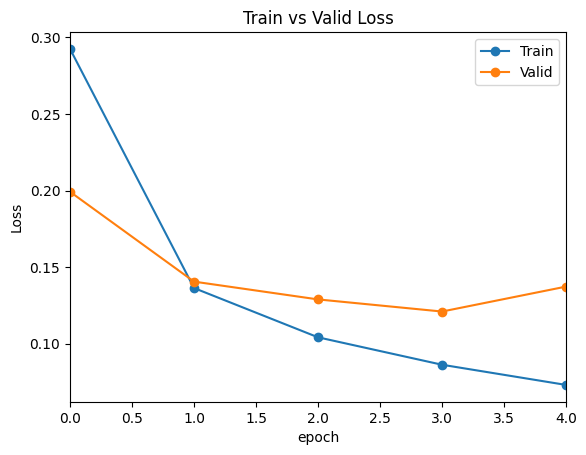

In [51]:
plt.plot(model_lrelu_train_loss,'-o')
plt.plot(model_lrelu_eval_loss,'-o')
plt.xlim(0,4)
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Loss')
plt.show()

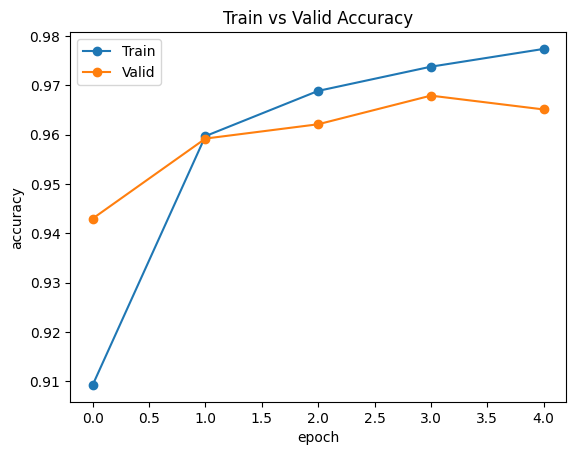

In [52]:
plt.plot(model_lrelu_train_acc,'-o')
plt.plot(model_lrelu_eval_acc,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Accuracy')
plt.show()

In [53]:
# Use the same variable names
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_tanh.parameters(), lr=0.002)

In [54]:
# Training Loop for TanH
model_tanh_train_acc = []
model_tanh_train_loss = []
model_tanh_eval_loss = []
model_tanh_eval_acc = []
for t in tqdm(range(epochs)):
    print(f"Epoch {t+1}\n-------------------------------")
    res_train = train(train_loader, model_tanh, criterion, optimizer)
    model_tanh_train_loss.append(res_train[0])
    model_tanh_train_acc.append(res_train[1])
    res_val = evaluate(val_loader, model_tanh, criterion)
    model_tanh_eval_loss.append(res_val[0])
    model_tanh_eval_acc.append(res_val[1])

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1
-------------------------------


100%|██████████| 782/782 [00:02<00:00, 307.41it/s]


Training Error: 
 Accuracy: 89.8%, Avg loss: 0.332941 



 20%|██        | 1/5 [00:02<00:11,  2.85s/it]

Validation Error: 
 Accuracy: 92.9%, Avg loss: 0.250944 

Epoch 2
-------------------------------


100%|██████████| 782/782 [00:02<00:00, 311.82it/s]


Training Error: 
 Accuracy: 94.7%, Avg loss: 0.180600 



 40%|████      | 2/5 [00:05<00:08,  2.84s/it]

Validation Error: 
 Accuracy: 95.1%, Avg loss: 0.183775 

Epoch 3
-------------------------------


100%|██████████| 782/782 [00:04<00:00, 175.74it/s]


Training Error: 
 Accuracy: 95.9%, Avg loss: 0.135521 



 60%|██████    | 3/5 [00:12<00:08,  4.44s/it]

Validation Error: 
 Accuracy: 95.5%, Avg loss: 0.170580 

Epoch 4
-------------------------------


100%|██████████| 782/782 [00:08<00:00, 96.88it/s]


Training Error: 
 Accuracy: 96.6%, Avg loss: 0.116579 



 80%|████████  | 4/5 [00:21<00:06,  6.60s/it]

Validation Error: 
 Accuracy: 95.5%, Avg loss: 0.169931 

Epoch 5
-------------------------------


100%|██████████| 782/782 [00:05<00:00, 139.28it/s]


Training Error: 
 Accuracy: 96.9%, Avg loss: 0.105750 



100%|██████████| 5/5 [00:28<00:00,  5.69s/it]

Validation Error: 
 Accuracy: 95.0%, Avg loss: 0.181196 



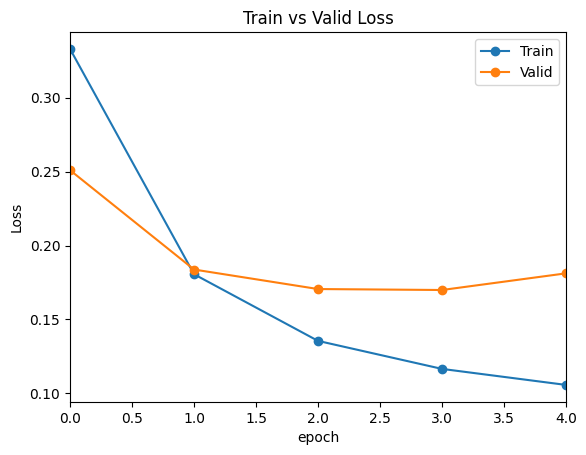

In [55]:
plt.plot(model_tanh_train_loss,'-o')
plt.plot(model_tanh_eval_loss,'-o')
plt.xlim(0,4)
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Loss')
plt.show()

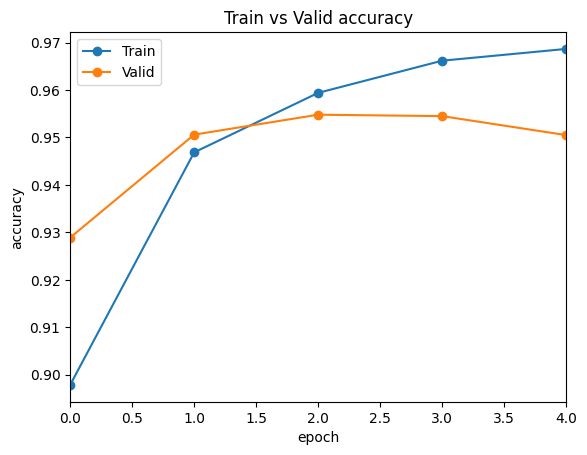

In [56]:
plt.plot(model_tanh_train_acc,'-o')
plt.plot(model_tanh_eval_acc,'-o')
plt.xlim(0,4)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid accuracy')
plt.show()

### Results on Test Set

Report the Test Set classfication accuracy for the three activation functions (ReLU, LeakyReLU & TanH) and state which activation function gave the best performance on test set

In [61]:
# Define how to calculate Accuracy on Test Set
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [62]:
# Accuracy of RELU model
test(test_loader, modelC, criterion)

Test Error: 
 Accuracy: 97.4%, Avg loss: 0.092413 



In [63]:
# Accuracy of TanH model
test(test_loader, model_tanh, criterion)

Test Error: 
 Accuracy: 95.2%, Avg loss: 0.173772 



In [64]:
# Accuracy of LeakyReLU model
test(test_loader, model_lrelu, criterion)

Test Error: 
 Accuracy: 97.1%, Avg loss: 0.104401 



Fill in these with the values you obtained from training.

* ReLU model Test Set Accuracy: 97.4 %
* TanH model Test Set Accuracy: 95.2 %
* LeakReLU model Test Set Accuracy: 97.1 %